# Assignment 03

Hyperparameter Tunning - Group 07
Tianqi Zhou -- tz232 Zixuan Li -- zl483 Yifei Wu -- yw924


## 6 Data Preparation (7 Points)


In [6]:
# Add data preparation code here
import numpy as np
import pandas as pd


### **6.1** Load the dataset and display the dataframe (2 Points).


In [4]:
# Add code here
g07_df = pd.read_csv("../Data/Cleaned/a3_cleaned_data.csv")
g07_df.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1,False


In [5]:
g07_df.isna().sum()


Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

### 6.2 Use describe to provide statistics on the pandas Dataframe (2 Points).


In [6]:
# Add code here
g07_df.describe()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,7.651987,2.124006,2.357097,3.147364,4.069586,1.718329,0.232603
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,3.392841,0.911325,1.717277,2.401591,4.025169,0.690759,0.422509
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,5.000000,2.000000,2.000000,1.000000,2.000000,2.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,7.000000,2.000000,2.000000,3.000000,2.000000,2.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,11.000000,3.000000,2.000000,4.000000,4.000000,2.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,12.000000,8.000000,13.000000,9.000000,20.000000,2.000000,1.000000


In [7]:
# Convert weekend column to numerical values (0 for False, 1 for True)
g07_df["Weekend"] = g07_df["Weekend"].astype(int)
# Convert month column to numerical
g07_df["Month"] = g07_df["Month"].map(
    {
        "Feb": 2,
        "Mar": 3,
        "May": 5,
        "June": 6,
        "Jul": 7,
        "Aug": 8,
        "Sep": 9,
        "Oct": 10,
        "Nov": 11,
        "Dec": 12,
    }
)


In [8]:
# Encode the Visitor Type column
from sklearn.preprocessing import LabelEncoder

g07_df["VisitorType"] = LabelEncoder().fit_transform(g07_df["VisitorType"])


In [9]:
g07_df.head(5)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,NaN,1,1,1,1,2,0,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,NaN,2,2,1,2,2,0,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,NaN,4,1,9,3,2,0,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,NaN,3,2,2,4,2,0,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,NaN,3,3,1,4,2,1,False


In [52]:
# g07_df.to_csv("a3_cleaned_data.csv", index=False)


### 6.3 Split the dataset into a Training set and a Test set. Justify your preferred split (3 Points).


In [7]:
# Read the cleaned dataset
g07_df = pd.read_csv("../Data/Cleaned/a3_cleaned_data.csv")


In [11]:
from sklearn.model_selection import train_test_split

random_seed = 6135  # last 4 digits of guid
X = g07_df.iloc[:, 0:-1]
y = g07_df.iloc[:, -1]
# split the train and test set at a 80/20 ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=random_seed
)


## 7 Classification Routine (12 Points):

Execute a classification routine using RandomForestClassifier(), BaggingClassifier(), and XGboostclassifier(). Independently output the accuracy box plot as discussed in class. Use any package you are comfortable with (seaborn, matplotlib).


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedKFold, cross_val_score


In [13]:
# Define the general routine for all classification models
def perform_classification_routine(model, X_train, y_train):
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    scores = cross_val_score(
        model, X_train, y_train, scoring="accuracy", cv=cv, n_jobs=-1
    )
    return scores


In [14]:
# Define plotting the resulting boxplot
def plot_boxplot(result):
    # set the size of the figure
    plt.figure(figsize=(12, 8))
    # plot the boxplot
    sns.boxplot(data=pd.DataFrame(result), orient="h")
    # add the title and axis labels
    plt.title("Accuracy of Classifiers")
    plt.xlabel("Accuracy")
    plt.ylabel("Classifier")
    plt.show()


### 7.1 RandomForestClassifier()


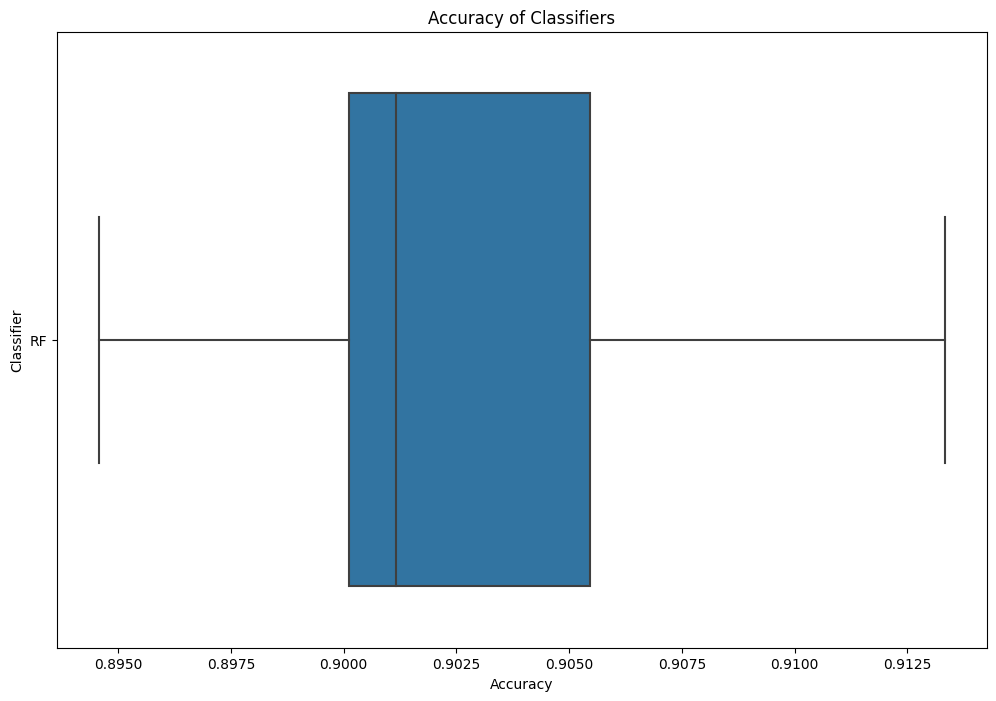

In [26]:
# Define the model
model_g07 = RandomForestClassifier(random_state=random_seed)
result = dict()
result["RF"] = perform_classification_routine(model_g07, X_train, y_train)

# Plotting the accuracy box plot
plot_boxplot(result)


### 7.2 BaggingClassifier()


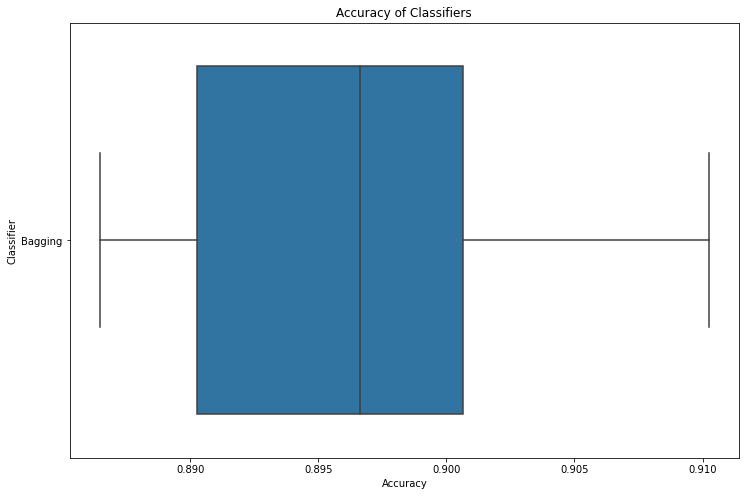

In [16]:
# Define the model
model_g07 = BaggingClassifier()
result = dict()
result["Bagging"] = perform_classification_routine(model_g07, X_train, y_train)

# Plotting the accuracy box plot
plot_boxplot(result)


### 7.3 XGboostclassifier()


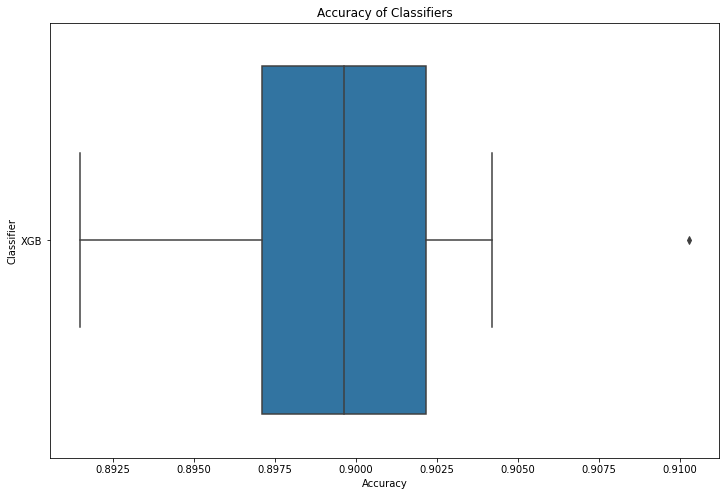

In [17]:
# Define the model
model_g07 = XGBClassifier()
result = dict()
result["XGB"] = perform_classification_routine(model_g07, X_train, y_train)

# Plotting the accuracy box plot
plot_boxplot(result)


In [2]:
import platform


In [3]:
#### DO NOT RUN THIS CELL AGAIN
my_system = platform.uname()
print(f"System: {my_system.system}")
print(f"Node Name: {my_system.node}")
print(f"Release: {my_system.release}")
print(f"Version: {my_system.version}")
print(f"Machine: {my_system.machine}")
print(f"Processor: {my_system.processor}")
print("Author of above content: Zixuan Li -- zl483")


System: Darwin
Node Name: hongshudediannao.local
Release: 22.6.0
Version: Darwin Kernel Version 22.6.0: Wed Jul  5 22:17:35 PDT 2023; root:xnu-8796.141.3~6/RELEASE_ARM64_T8112
Machine: arm64
Processor: arm
Author of above content: Zixuan Li -- zl483


### According to the results of the three above models, the model with the best performance is the random forest classifier. Therefore, we will do hyperparameter tuning on this model.


## 8 Classification with GridSearchCV (8 Points):

Replicate the classification from Q2 using GridsearchCV().


In [24]:
from sklearn.model_selection import GridSearchCV

# get the model
model_g07 = RandomForestClassifier(random_state=random_seed)

# define the hyperparameter space for grid search
param_grid = {
    "n_estimators": [20, 50, 100, 200],  # the number of trees in the forest
    "max_depth": [5, 10, 15, 20],  # the max depth of a tree
    "min_samples_split": [
        2,
        5,
        10,
    ],  # the minimum number of samples required to split an internal node
    "min_samples_leaf": [
        1,
        4,
        8,
        16,
    ],  # the minimum number of samples required to be at a leaf node
    "max_features": ["log2", "sqrt"],  # the number of max features
    "max_leaf_nodes": [10, 20, 40, 60, 80],  # the number of max leaf nodes
    "max_samples": [None, 1000, 5000],  # the number of max samples during bootstrap
}

# initialize the grid search
grid_search = GridSearchCV(
    estimator=model_g07, param_grid=param_grid, cv=5, scoring="accuracy", n_jobs=-1
)
# do grid search
grid_search.fit(X_train, y_train)
# print the result of the grid search
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Hyperparameters: {'max_depth': 15, 'max_features': 'log2', 'max_leaf_nodes': 60, 'max_samples': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Accuracy: 0.9077448701486291


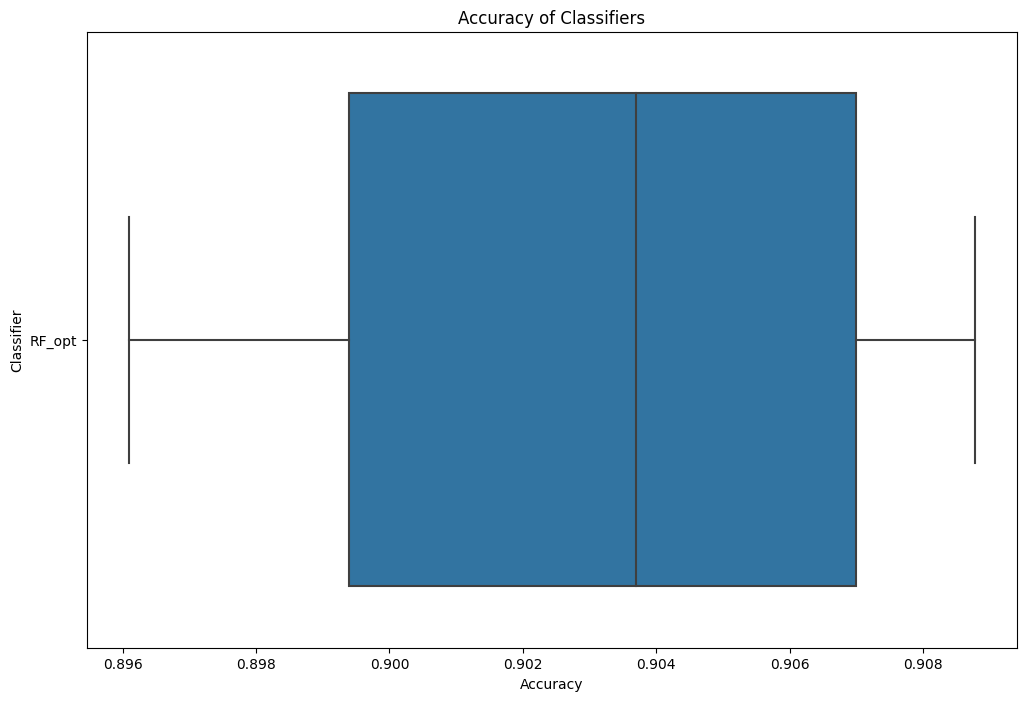

In [25]:
# Plot the boxplot of the best parameter
model_g07 = RandomForestClassifier(
    max_depth=15,
    max_features="log2",
    max_leaf_nodes=60,
    max_samples=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=50,
    random_state=random_seed,
)
result = dict()
result["RF_opt"] = perform_classification_routine(model_g07, X_train, y_train)

# Plotting the accuracy box plot
plot_boxplot(result)


In [29]:
#### DO NOT RUN THIS CELL AGAIN
my_system = platform.uname()
print(f"System: {my_system.system}")
print(f"Node Name: {my_system.node}")
print(f"Release: {my_system.release}")
print(f"Version: {my_system.version}")
print(f"Machine: {my_system.machine}")
print(f"Processor: {my_system.processor}")
print("Author of above content: Tianqi Zhou -- tz232")


System: Windows
Node Name: LAPTOP-0I70UK1V
Release: 10
Version: 10.0.19045
Machine: AMD64
Processor: AMD64 Family 25 Model 80 Stepping 0, AuthenticAMD
Author of above content: Tianqi Zhou -- tz232


## 9 Classification with RandomSearchCV (8 Points):

Replicate the classification from Q2 using RandomSearchCV().


In [32]:
from sklearn.model_selection import RandomizedSearchCV

# Get the model
model_g07 = RandomForestClassifier(random_state=random_seed)

# Define the hyperparameter space for random search
param_dist = {
    "n_estimators": [20, 50, 100, 200],  # Number of trees in the forest
    "max_depth": [5, 10, 15, 20],  # Maximum depth of a tree
    "min_samples_split": [
        2,
        5,
        10,
    ],  # Minimum number of samples required to split an internal node
    "min_samples_leaf": [
        1,
        4,
        8,
        16,
    ],  # Minimum number of samples required to be at a leaf node
    "max_features": [
        "log2",
        "sqrt",
    ],  # Maximum number of features to consider for the best split
    "max_leaf_nodes": [10, 20, 40, 60, 80],  # Maximum number of leaf nodes
    "max_samples": [None, 1000, 5000],  # Number of samples to draw during bootstrap
}

# Initialize the random search
random_search = RandomizedSearchCV(
    estimator=model_g07,
    param_distributions=param_dist,
    n_iter=500,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    random_state=random_seed,
)

# Perform random search
random_search.fit(X_train, y_train)

# Print the result of the random search
print("Best Hyperparameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)


Best Hyperparameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_samples': 5000, 'max_leaf_nodes': 60, 'max_features': 'log2', 'max_depth': 10}
Best Accuracy: 0.9076438615014665


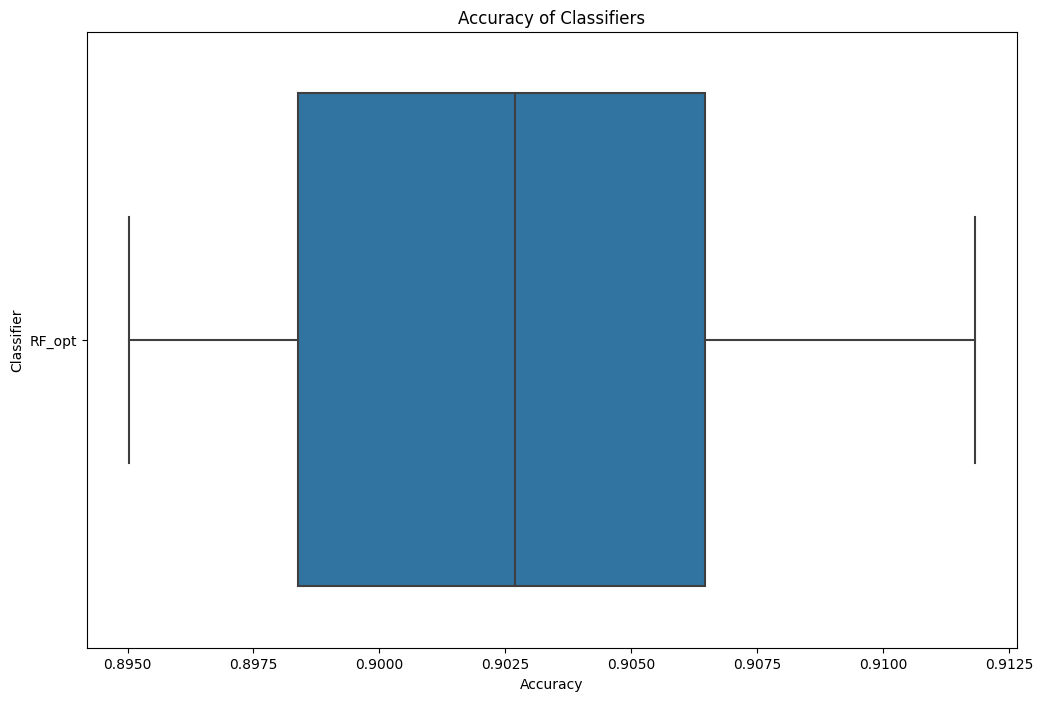

In [33]:
# Plot the boxplot of the best parameter
model_g07 = RandomForestClassifier(
    n_estimators=50,
    min_samples_split=2,
    min_samples_leaf=4,
    max_samples=5000,
    max_leaf_nodes=60,
    max_features="log2",
    max_depth=10,
    random_state=random_seed,
)

result = dict()
result["RF_opt"] = perform_classification_routine(model_g07, X_train, y_train)

# Plotting the accuracy box plot
plot_boxplot(result)


In [27]:
#### DO NOT RUN THIS CELL AGAIN
my_system = platform.uname()
print(f"System: {my_system.system}")
print(f"Node Name: {my_system.node}")
print(f"Release: {my_system.release}")
print(f"Version: {my_system.version}")
print(f"Machine: {my_system.machine}")
print(f"Processor: {my_system.processor}")
print("Author of above content: Yifei Wu  -- yw924")


System: Darwin
Node Name: wuyifeideMacBook-Pro-2.local
Release: 22.5.0
Version: Darwin Kernel Version 22.5.0: Thu Jun  8 22:22:20 PDT 2023; root:xnu-8796.121.3~7/RELEASE_ARM64_T6000
Machine: x86_64
Processor: i386
Author of above content: Yifei Wu  -- yw924


## 10 Comparison and Analysis (5 Points):

Compare the results from Q2, Q3, and Q4. Describe the best hyperparameters for all three experiments.


According to the boxplot of the results of the cross-validation, the random forest classifier from Q2 with no hyperparameter tuning has a median accuracy of around 0.901 and an accuracy range of around (0.8945, 0.9135). The random forest classifier from Q3 with hyperparameter tuning using grid search has a median accuracy of around 0.9038 and an accuracy range of around (0.896, 0.909). The random forest classifier from Q4 with hyperparameter tuing using random search has a median accuracy of around 0.9026 and an accuracy range of around (0.8950, 0.912). Based on these observations, we can conclude that with hyperparameter tuning, we can have a higher median accuracy and smaller variation. Moreover, there're differences between the hyperparameters chosen by grid search and random search. Grid search compares all possible parameter combos, therefore takes much longer but has a better performance. Random search requires large numbers of iterations to get a similar result but is faster. In real life, it might be impossible to use grid search due to computational complexity, so random search may be a good choice.
